In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#一些相關的函數
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from keras.datasets import mnist

from keras.utils import np_utils

from keras.utils import to_categorical


In [15]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

In [16]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data() #讀入mnist

In [17]:
print("共 %d 訓練資料，每筆資料的大小為 %d x %d" %x_train0.shape)
print("共 %d 測試資料，每筆資料的大小為 %d x %d" %x_test0.shape)

共 60000 訓練資料，每筆資料的大小為 28 x 28
共 10000 測試資料，每筆資料的大小為 28 x 28


In [18]:
#輸入格式整理
x_train = x_train0.reshape(60000,28*28)
x_test = x_test0.reshape(10000,28*28)
y_train = to_categorical(y_train0,10)
y_test = to_categorical(y_test0,10)

# 建立模型
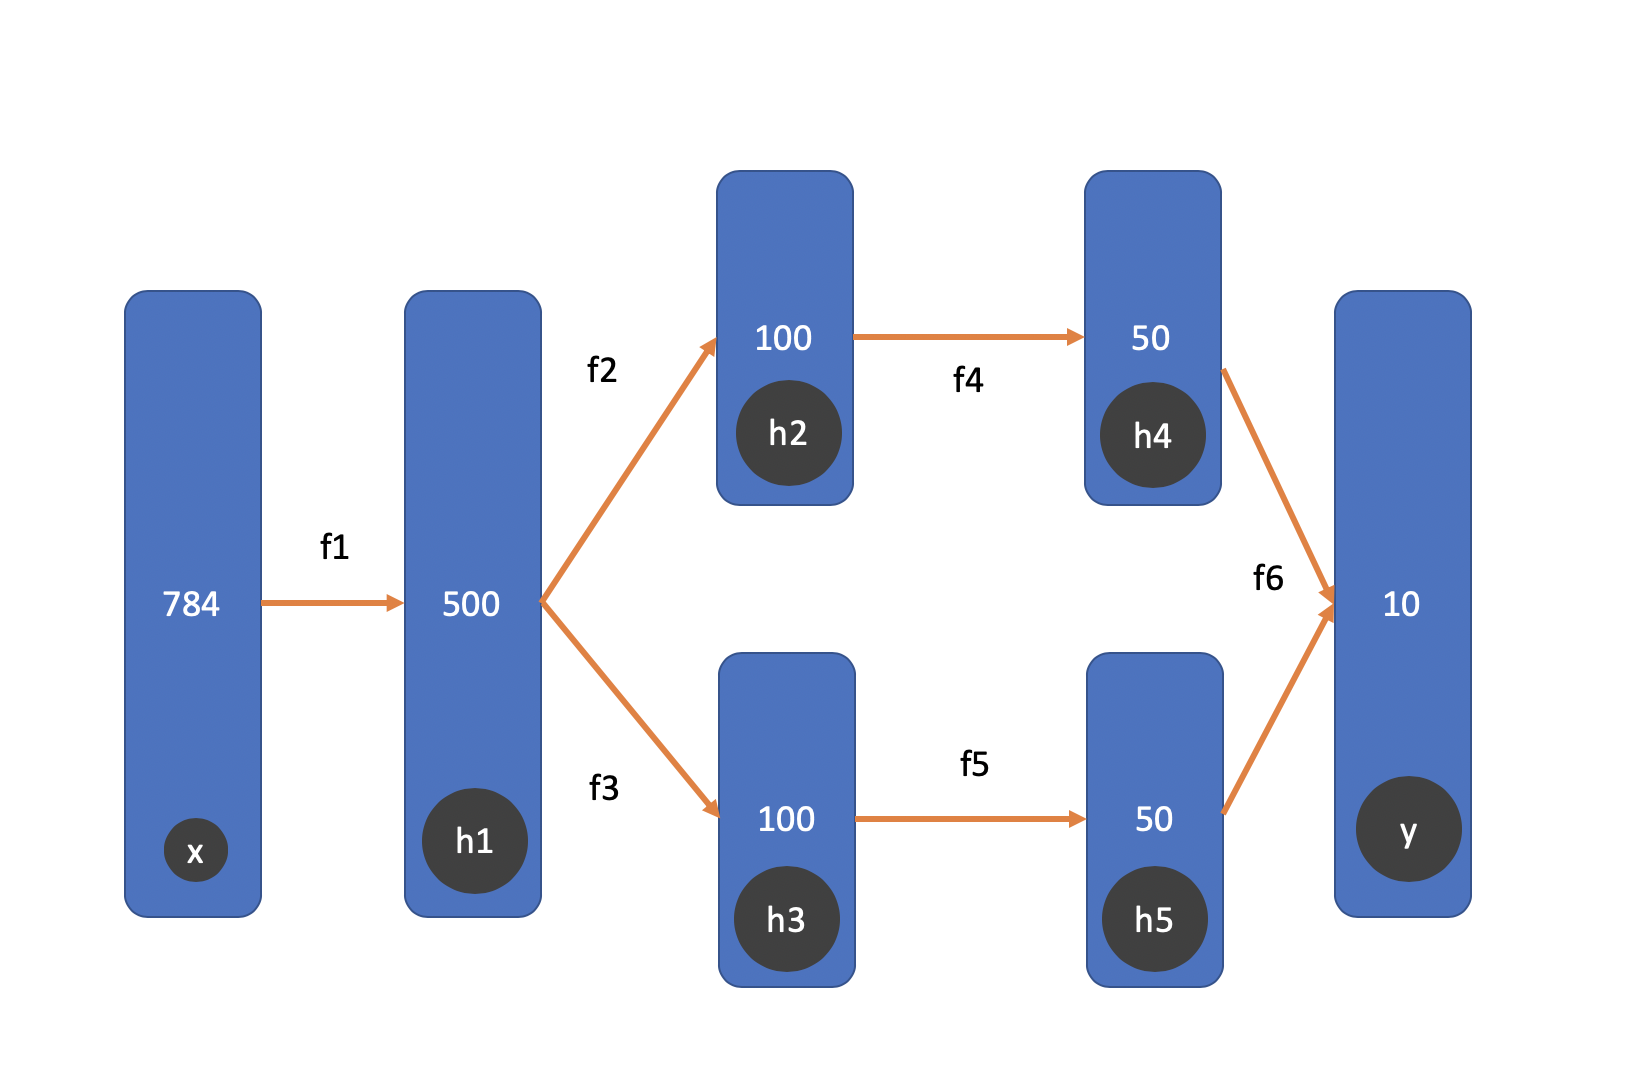

In [19]:
x = Input(shape=(784,))

In [20]:
f_1 = Dense(500, activation='sigmoid') #784-->500
f_2 = Dense(100, activation='sigmoid') #500-->100
f_3 = Dense(100, activation='relu') #500-->100
f_4 = Dense(50, activation='relu') #100-->50
f_5 = Dense(50, activation='sigmoid')  #100-->50
f_6 = Dense(10, activation='softmax') #50-->10

In [22]:
h1 = f_1(x)
h2 = f_2(h1)
h3 = f_3(h1)
h4 = f_4(h2)
h5 = f_5(h3)

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
u = concatenate([h4,h5])
y = f_6(u)

In [24]:
model = Model(x,y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          50100       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 100)          50100       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [25]:
model.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])
reslut = model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0200 - acc: 0.8736 - val_loss: 0.0132 - val_acc: 0.9149
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0129 - acc: 0.9158 - val_loss: 0.0130 - val_acc: 0.9125
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0119 - acc: 0.9218 - val_loss: 0.0112 - val_acc: 0.9274
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0116 - acc: 0.9231 - val_loss: 0.0106 - val_acc: 0.9320
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0112 - acc: 0.9254 - val_loss: 0.0105 - val_acc: 0.9320
Epoch 6/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0100 - acc: 0.9346 - val_loss: 0.0095 - val_acc: 0.9376
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 0

In [26]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 0s 21us/step
loss: 0.006952336592104985
accuracy: 0.9531
